In [2]:
import pandas as pd
import plotly.express as px


In [4]:
data_import = pd.read_csv('Data_Science_Fields_Salary_Categorization.csv')
data_import.head()

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,MI,FT,"6,352,272.00",DE,DE,L,0
1,2,2020,Machine Learning Scientist,SE,FT,"20,688,070.00",JP,JP,S,0
2,3,2020,Big Data Engineer,SE,FT,"8,674,985.00",GB,GB,M,50
3,4,2020,Product Data Analyst,MI,FT,"1,591,390.00",HN,HN,S,0
4,5,2020,Machine Learning Engineer,SE,FT,"11,935,425.00",US,US,L,50


In [5]:
data_import.columns

Index(['Unnamed: 0', 'Working_Year', 'Designation', 'Experience',
       'Employment_Status', 'Salary_In_Rupees', 'Employee_Location',
       'Company_Location', 'Company_Size', 'Remote_Working_Ratio'],
      dtype='object')

In [6]:
data_import.describe()

,Unnamed: 0,Working_Year,Remote_Working_Ratio
count,607.000000,607.000000,607.00000
mean,304.000000,2021.405272,70.92257
std,175.370085,0.692133,40.70913
min,1.000000,2020.000000,0.00000
25%,152.500000,2021.000000,50.00000
50%,304.000000,2022.000000,100.00000
75%,455.500000,2022.000000,100.00000
max,607.000000,2022.000000,100.00000


In [7]:
data_import.shape

(607, 10)

In [8]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            607 non-null    int64 
 1   Working_Year          607 non-null    int64 
 2   Designation           607 non-null    object
 3   Experience            607 non-null    object
 4   Employment_Status     607 non-null    object
 5   Salary_In_Rupees      607 non-null    object
 6   Employee_Location     607 non-null    object
 7   Company_Location      607 non-null    object
 8   Company_Size          607 non-null    object
 9   Remote_Working_Ratio  607 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 47.5+ KB


Convert Salary in int

In [9]:
data_import['Salary_In_Rupees'] = data_import['Salary_In_Rupees'].str.replace(',','').str.split('.',expand=True)[0]
data_import['Salary_In_Rupees'] = data_import['Salary_In_Rupees'].astype('int64')
data_import.head()

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,MI,FT,6352272,DE,DE,L,0
1,2,2020,Machine Learning Scientist,SE,FT,20688070,JP,JP,S,0
2,3,2020,Big Data Engineer,SE,FT,8674985,GB,GB,M,50
3,4,2020,Product Data Analyst,MI,FT,1591390,HN,HN,S,0
4,5,2020,Machine Learning Engineer,SE,FT,11935425,US,US,L,50


Arrange Data by Designation With its Average Salary

In [10]:
avg_salary = data_import.groupby('Designation')['Salary_In_Rupees'].mean().reset_index()
avg_salary['Salary_In_Rupees'] = avg_salary['Salary_In_Rupees'].astype('int64')
avg_salary.head()

,Designation,Salary_In_Rupees
0,3D Computer Vision Researcher,430391
1,AI Scientist,5262374
2,Analytics Engineer,13924662
3,Applied Data Scientist,13976780
4,Applied Machine Learning Scientist,11304339


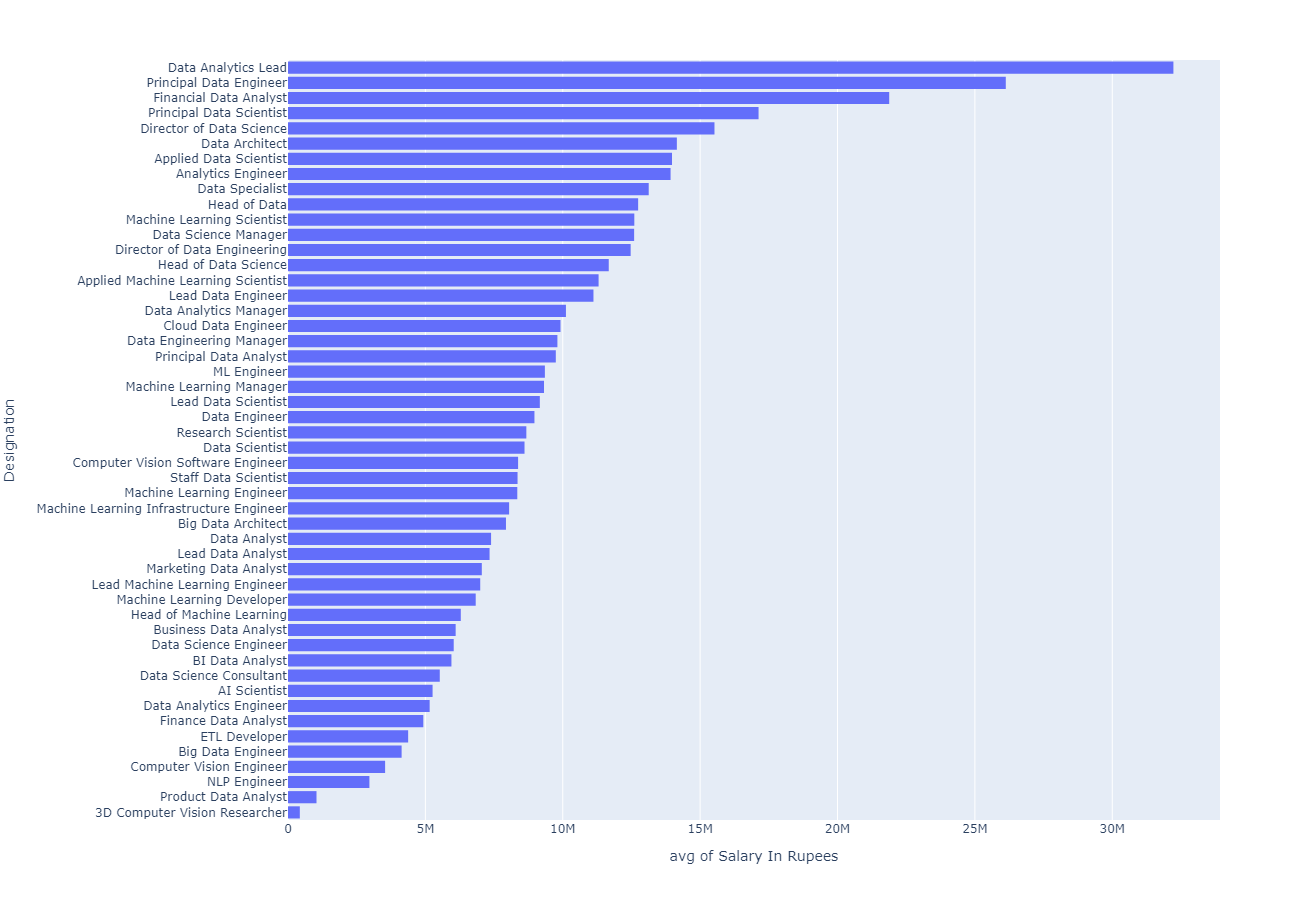

In [23]:
fig = px.histogram(avg_salary, y = 'Designation', x = 'Salary_In_Rupees', height=900, width=1300, histfunc='avg', labels={'Salary_In_Rupees':'Salary In Rupees'}).update_yaxes(categoryorder='total ascending')
fig.show("png")

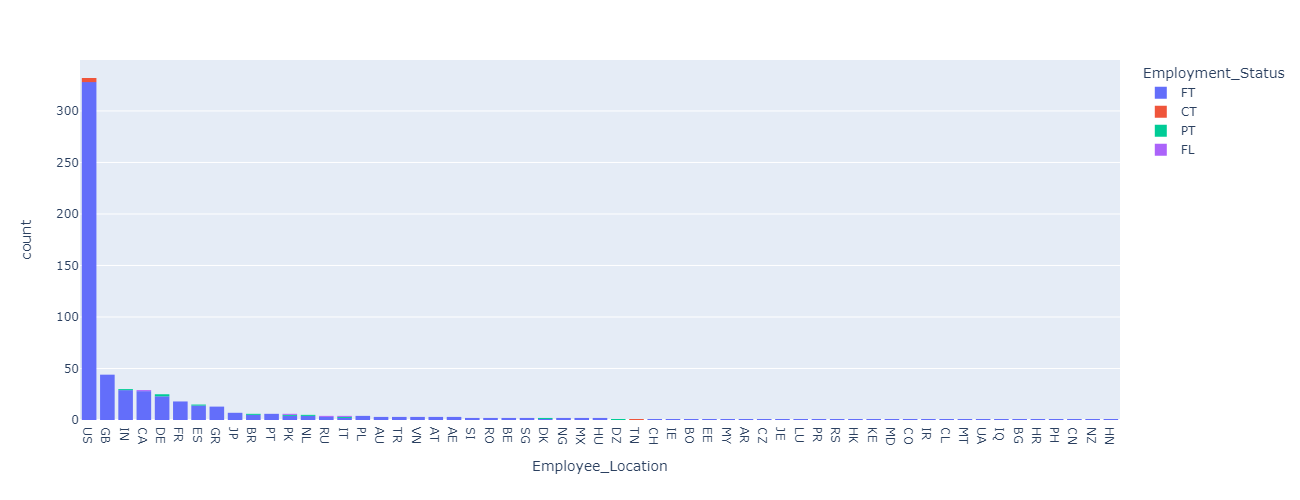

In [22]:
fig = px.histogram(data_import, 'Employee_Location', color = 'Employment_Status', width=1300).update_xaxes(categoryorder="total descending")
fig.show("png")

In [13]:
data_import.columns

Index(['Unnamed: 0', 'Working_Year', 'Designation', 'Experience',
       'Employment_Status', 'Salary_In_Rupees', 'Employee_Location',
       'Company_Location', 'Company_Size', 'Remote_Working_Ratio'],
      dtype='object')

In [14]:
S = data_import[data_import.Company_Size == "S"]
M = data_import[data_import.Company_Size == "M"]
L = data_import[data_import.Company_Size == "L"]
C_Size = pd.concat([S,M,L])
C_Size.head()
#print('S:', S.shape, 'M:', M.shape, 'L:', L.shape)

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
1,2,2020,Machine Learning Scientist,SE,FT,20688070,JP,JP,S,0
3,4,2020,Product Data Analyst,MI,FT,1591390,HN,HN,S,0
6,7,2020,Lead Data Scientist,SE,FT,15118205,US,US,S,100
9,10,2020,Lead Data Engineer,SE,FT,9946188,NZ,NZ,S,50
10,11,2020,Data Scientist,EN,FT,4083586,FR,FR,S,0


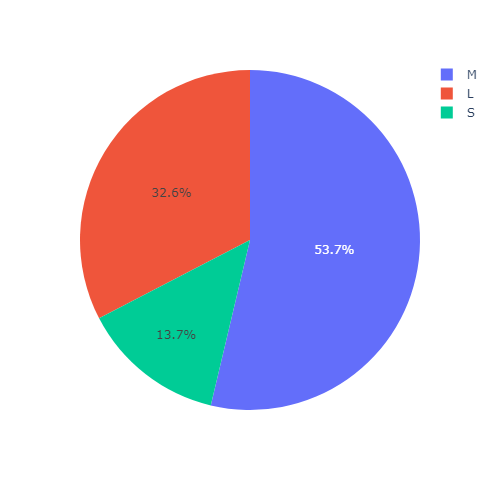

In [15]:
fig = px.pie(data_import,'Company_Size', width=500)
fig.show("png")

In [ ]:
print('S.mean :%.2f' % S['Salary_In_Rupees'].mean())
print('M.mean :%.2f' % M['Salary_In_Rupees'].mean())
print('L.mean :%.2f' % L['Salary_In_Rupees'].mean())

S.mean :6177193.12
M.mean :9302109.57
L.mean :9488105.59


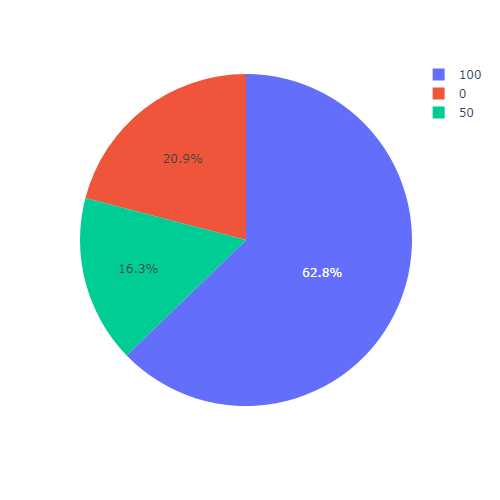

In [16]:
fig = px.pie(data_import, "Remote_Working_Ratio", width=500)
fig.show("png")

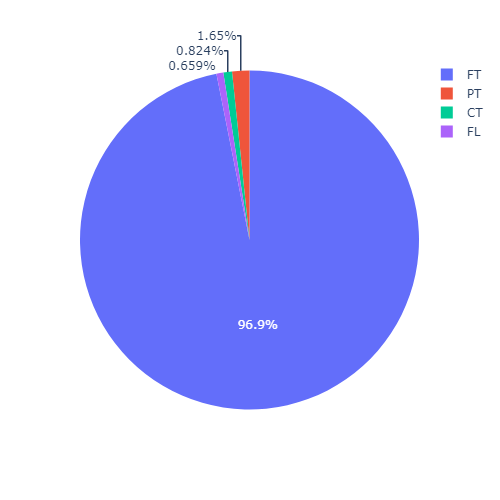

In [17]:
fig = px.pie(data_import, "Employment_Status", width=500)
fig.show("png")

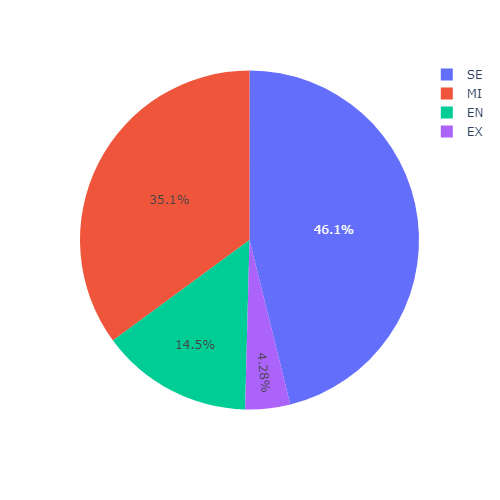

In [18]:
fig = px.pie(data_import, "Experience", width=500)
fig.show("png")

In [ ]:
"""

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "domain"}, {"type": "domain"}]],
    subplot_titles=("<b>2020<b>","<b>2021<b>")
)

fig.add_trace(go.Pie(values = data_import['Employment_Status']),
              row=1, col=1)

fig.add_trace(go.Pie(values = data_import['Company_Size']),
              row=1, col=2)

fig.update_layout(title_text="<b>pie<b>",
                  height=600,
                  showlegend=True
                  )


"""

'\n\nfig = make_subplots(\n    rows=1, cols=2,\n    specs=[[{"type": "domain"}, {"type": "domain"}]],\n    subplot_titles=("<b>2020<b>","<b>2021<b>")\n)\n\nfig.add_trace(go.Pie(values = data_import[\'Employment_Status\']),\n              row=1, col=1)\n\nfig.add_trace(go.Pie(values = data_import[\'Company_Size\']),\n              row=1, col=2)\n\nfig.update_layout(title_text="<b>pie<b>",\n                  height=600,\n                  showlegend=True\n                  )\n\n\n'